In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/kaggle/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
importlib.reload(fls);
fls.profiling=False

MainProcess
MainProcess


In [25]:
files = glob.glob(fls.result_dir + '/many_abbr_full/Baseline_*M*')
models = [fls.dill_load(f) for f in files]
models = sorted(models, key=lambda d:d.trained_model.seed)

In [26]:
# for m in models[0:1]:
#     m.trained_model.step1Labels.relative_confidence_threshold = 0.001
#     m.inferred_test_data = m.trained_model.infer(m.test_data)

In [27]:
#fls.dill_save(fls.temp_dir + '/models_reinferred.pickle', models)

In [28]:
data = copy.deepcopy(models[0].inferred_test_data)

In [29]:
def visualize_slice(data, z_list):
    preprocessor = copy.deepcopy(models[0].trained_model.step1Labels.preprocessor)
    preprocessor.blur_xy = 2
    preprocessor.scale_moving_average = True
    #preprocessor.moving_ratio = 0.
    data = copy.deepcopy(data)
    preprocessor.load_and_preprocess(data, desired_original_slices = z_list)
    dat = []
    for mm in range(5):
        m = copy.deepcopy(models[mm].trained_model)
        m.step1Labels.preprocessor = preprocessor
        m.step1Labels.relative_confidence_threshold = 0.01
        m.step2Motors.distance_threshold = 10.
        m.run_in_parallel = False
        dat.append (m.infer([data])[0])
    for i_z,z in enumerate(data.slices_present):
    #     if data.slices_present[i_z]==z:
    #         break
    # else:
    #     raise 'stop'
        plt.figure()
        plt.imshow(data.data[i_z,:,:], cmap='bone')
        plt.colorbar()
        plt.title(data.name + ', ' + str(z))
        for d in dat:
            assert d.name == data.name
            to_plot = d.labels_unfiltered2
        
            to_plot = to_plot[to_plot['z']==z]
            print('z: ', z)
            print(to_plot)
    
            plt.scatter(to_plot['x'], to_plot['y'])
#             #print(dat)    
    # for mm in range(1):
    #     # m = copy.deepcopy(models[mm].trained_model)
    #     # m.step1Labels.relative_confidence_threshold = 0.01
    #     # m.step2Motors.distance_threshold = 10.
    #     # m.run_in_parallel = False
    #     # dat = m.infer([data])
    #     dat = models[mm].inferred_test_data
    #     for d in dat:
    #         if d.name == data.name:
    #             to_plot = d.labels_unfiltered2
            
    #             to_plot = to_plot[to_plot['z']==z]
    #             print(to_plot)
        
    #             plt.scatter(to_plot['x'], to_plot['y'])
    #             #print(dat)    

Clearing pytorch
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram aba2015-07-07-5 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  301  625  420    0.715332
1  293  725  853    0.018539
2  301  906  877    0.016983
3  299  920  512    0.013741
4  299   10  101    0.009193
5  291  903  445    0.008255
6  285   18  554    0.007233

Clearing pytorch
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram aba2015-07-07-5 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence
0  300  630  435    0.085083
1  289   13  314    0.001124
2  301    9  362    0.000989

Clearing pytorch
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram aba2015-07-07-5 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
FINAL
     z    y   

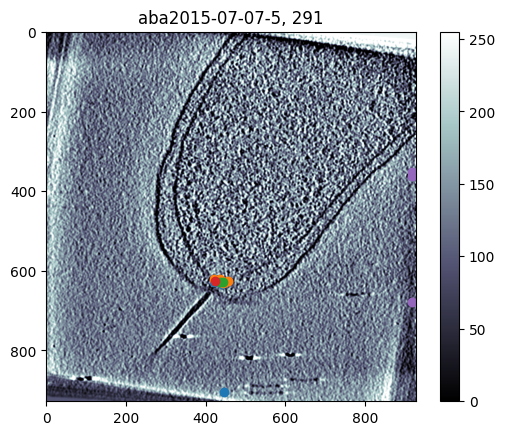

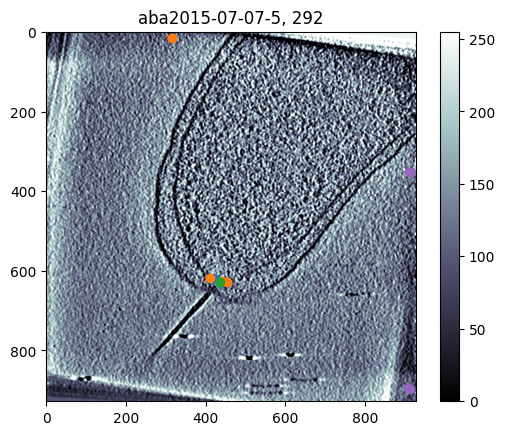

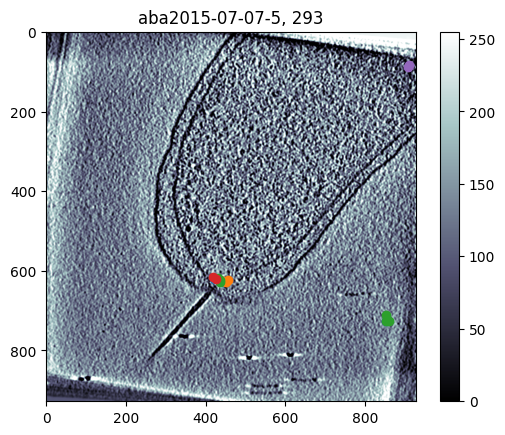

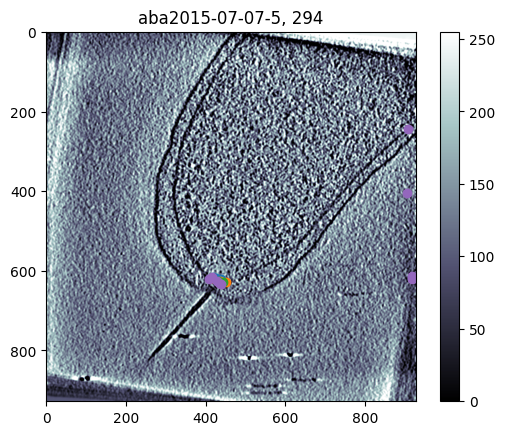

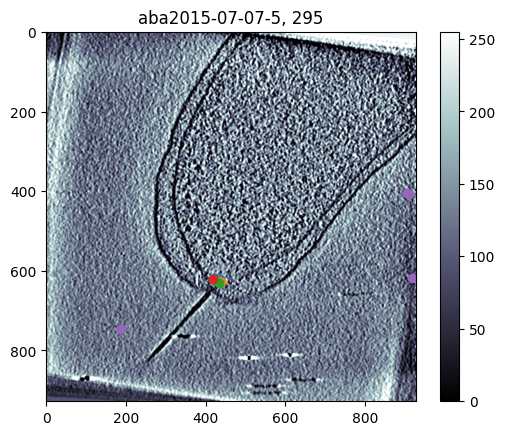

In [30]:
data[100].name
visualize_slice(data[100], list(np.arange(291,296)))

tomo_8554af
Clearing pytorch
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram tomo_8554af (1/1)
Processing 300 out of 300 slices (CONCENTRATION=1)
FINAL
      z    y    x  confidence
0    35  548  769    0.718750
1    89  253  540    0.689453
2   121  298  534    0.521484
3   138  244  519    0.294922
4   161  848  429    0.169922
5   125  856  212    0.156128
6   167  460   69    0.091370
7   143  531  141    0.079224
8   169  234  459    0.075317
9    47  314  547    0.049957
10  161  949  620    0.035828
11  235  728  672    0.028656
12  141  595  185    0.027176
13    0  946  437    0.026855
14  106  541  219    0.026855
15  177  947  634    0.024704
16  163  931  455    0.023956
17  248  443   45    0.023376
18  187  944  565    0.021042
19  115  643  483    0.020966
20  167  105  331    0.020340
21   11  209  485    0.020020
22   89   13   42    0.019119
23  103  827  553    0.016464
24   56  497  572    0.01602

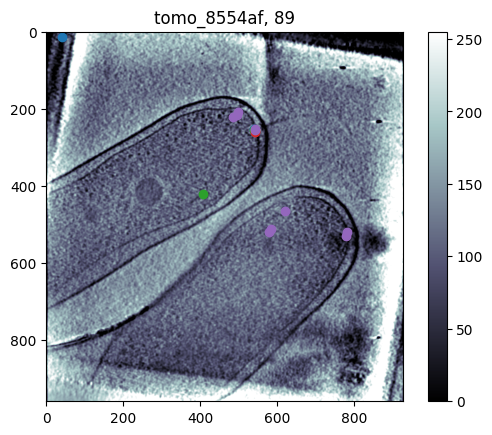

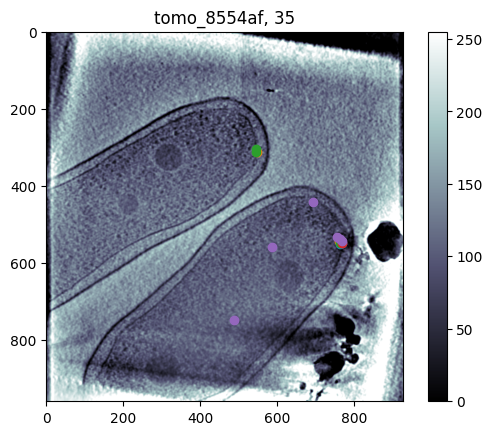

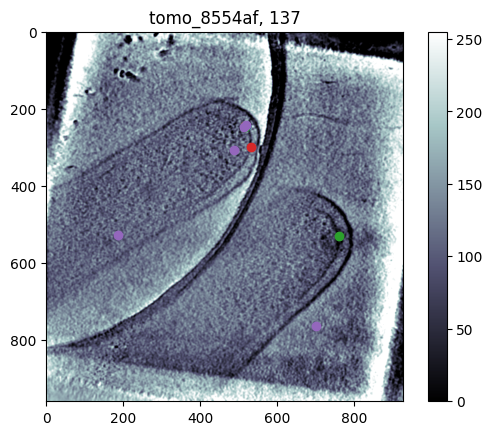

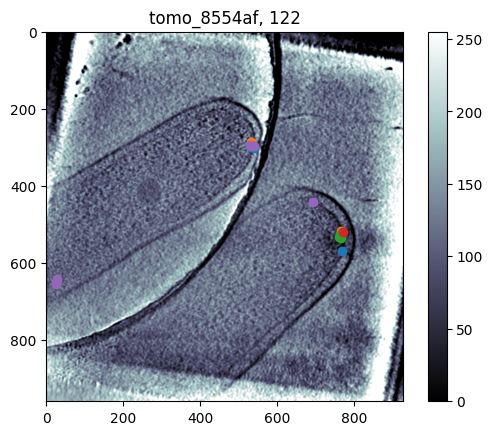

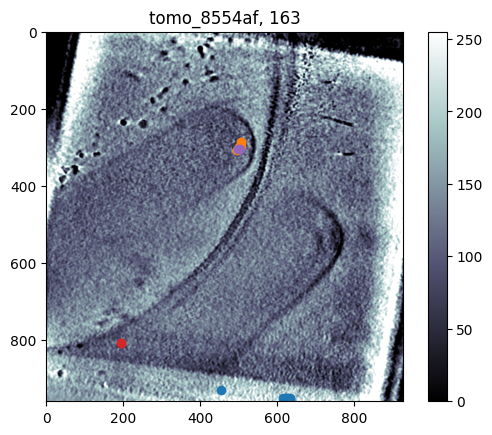

In [31]:
print(data[101].name)
visualize_slice(data[101], [89,35,137,122,163])

In [9]:
data[100]

DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])

In [10]:
dat = copy.deepcopy(data[100])
dat = models[0].trained_model.infer([dat])[0]
dat

Clearing pytorch


DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])

In [11]:
models[0].inferred_test_data[100]

DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])

In [12]:
data[101]

DataKaggle(is_train=True, name='tomo_8554af', labels=   index    z    y    x  confidence    value
0      0  102  251  545     0.84082  0.84082, labels_unfiltered=     z    y    x  confidence
0  102  251  545    0.840820
1   75  520  782    0.747559, labels_unfiltered2=       z    y    x  confidence  i_model
147   34  548  770    0.229492        0
149   35  548  770    0.571777        0
150   36  549  770    0.424316        0
151   36  550  772    0.258301        0
154   38  553  771    0.247314        0
..   ...  ...  ...         ...      ...
419  123  292  538    0.613281        0
420  124  292  538    0.554688        0
421  125  292  538    0.311523        0
423  126  296  538    0.314941        0
424  127  296  538    0.252441        0

[63 rows x 5 columns], loaded_state='unloaded', data=None, data_shape=(300, 960, 928), voxel_spacing=15.6, resize_factor=1.0, slices_present=[])

In [13]:
for d in fls.load_all_train_data():
    if d.name == 'tomo_8554af':
        print(d)

DataKaggle(is_train=True, name='tomo_8554af', labels=    z    y    x
0  93  254  549, labels_unfiltered=Empty DataFrame
Columns: []
Index: [], labels_unfiltered2=Empty DataFrame
Columns: []
Index: [], loaded_state='unloaded', data=None, data_shape=(300, 960, 928), voxel_spacing=15.6, resize_factor=nan, slices_present=[])
